Student Performance Indicator
Life cycle of Machine learning Project
 Understanding the Problem Statement
 <p> Data Collection
 <p> Data Checks to perform
 <p> Exploratory data analysis
 <p> Data Pre-Processing
 <p> Model Training
 <p> Choose best model

 
1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2.1) import data and required project


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import  matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Import the CSV  Data as pandas dataframe

In [2]:
df = pd.read_csv("../data/stud.csv")

Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

2.2) Dataset Information

<li> There are two types of Gender -  Male and Female. </li>
<li> Group (A,B,C,D,E)
<li> Total 6 Types of Degree achived by student -
    <ol>
    <li> Bachelors </li>
    <li>  Masters </li>
    <li>  Associate </li>
    <li>  High School </li>
    <li> other college degree </li>
    <li> other school degree </li>
    </ol>



3) Data Check perform

<li> Check Missing values
<li> Check Duplicates
<li> Check data type
<li> Check the number of unique values of each column
<li> Check statistics of data set
<li> Check various categories present in the different categorical column

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

The dataset doesn't contain any null value


### Check for duplicate

In [6]:
df.duplicated().sum()

0

The dataset doesn't contain any duplicated value

Check columns data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check number of unnique value for each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check Statistical data

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight 
<li> There are 3 column math score, reading_score and writting socre mean value lies in between 66.0 - 69.20
<li> All Standard division falls between 14.60 - 15.20
<li> In math minimum score is 0 and maximum score  is 100



## Explore the data


In [10]:
print("--"*50)
print("Categories in 'gender' variable:","[" + " , ".join(map(str,df['gender'].unique()))+"]")

print("--"*50)

print("Categories in 'race_ethnicity' variable:","[" + " , ".join(map(str,df['race_ethnicity'].unique()))+"]")
print("--"*50)

print("Categories in'parental level of education' variable:","[" + " , ".join(map(str,df['parental_level_of_education'].unique()))+"]")
print("--"*50)

print("Categories in 'lunch' variable:","[" + " , ".join(map(str,df['lunch'].unique()))+"]")
print("--"*50)

print("Categories in 'test preparation course' variable:","[" + " , ".join(map(str,df['test_preparation_course'].unique()))+"]")
print("--"*50)

----------------------------------------------------------------------------------------------------
Categories in 'gender' variable: [female , male]
----------------------------------------------------------------------------------------------------
Categories in 'race_ethnicity' variable: [group B , group C , group A , group D , group E]
----------------------------------------------------------------------------------------------------
Categories in'parental level of education' variable: [bachelor's degree , some college , master's degree , associate's degree , high school , some high school]
----------------------------------------------------------------------------------------------------
Categories in 'lunch' variable: [standard , free/reduced]
----------------------------------------------------------------------------------------------------
Categories in 'test preparation course' variable: [none , completed]
--------------------------------------------------------------------

types of column

In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Add Total score and average socre 

In [12]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Find student who got full marks

In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Find The student who got less than 20

In [14]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


4. Exploring Data Visualization

<li> Visualize average score distribution

use Histogram and KDE plot


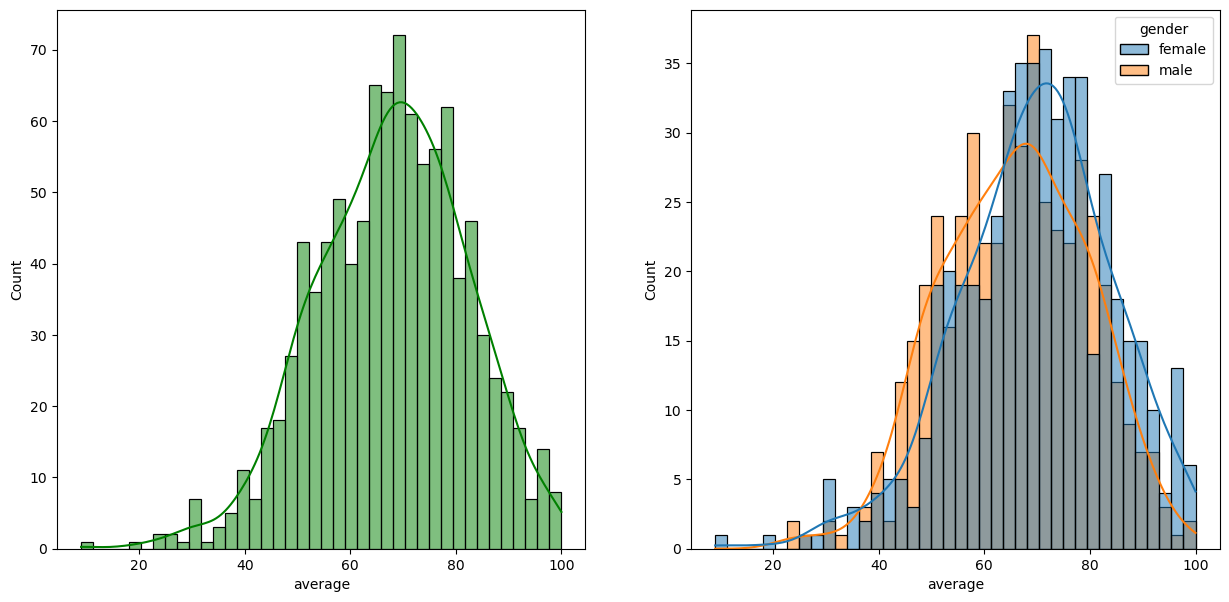

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=40,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender',bins=40)
plt.show()

In [16]:
import plotly.express as px

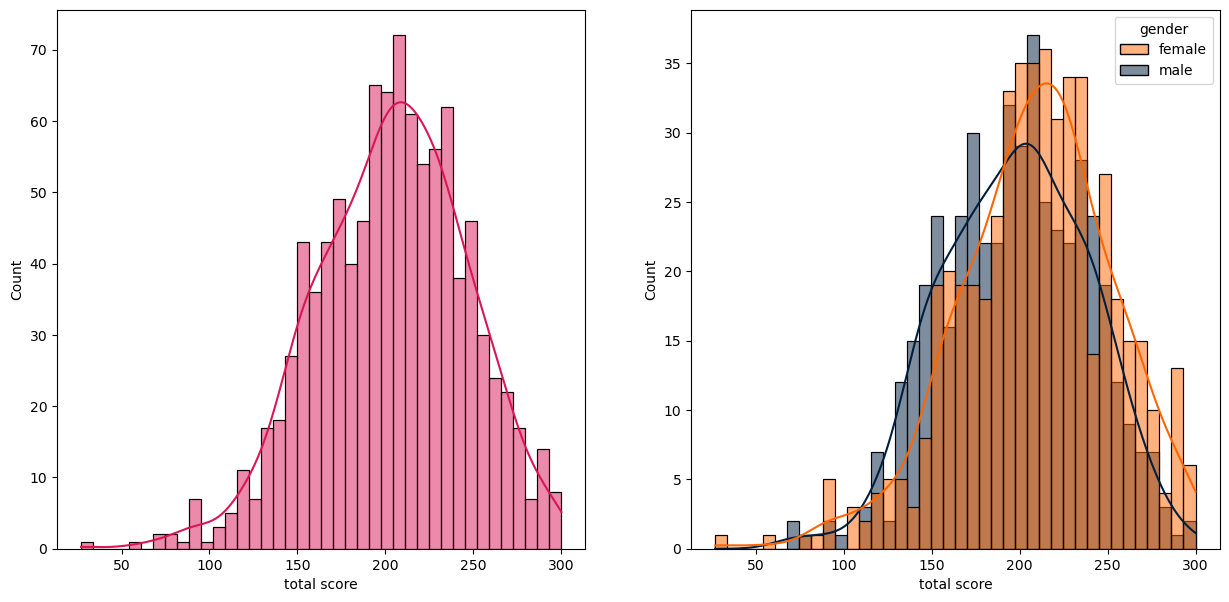

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=40,kde=True,color='#D91656')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender',bins=40,palette=['#FF6500','#001F3F'])
plt.show()


Insight
<li> Female perform better than male in the exam

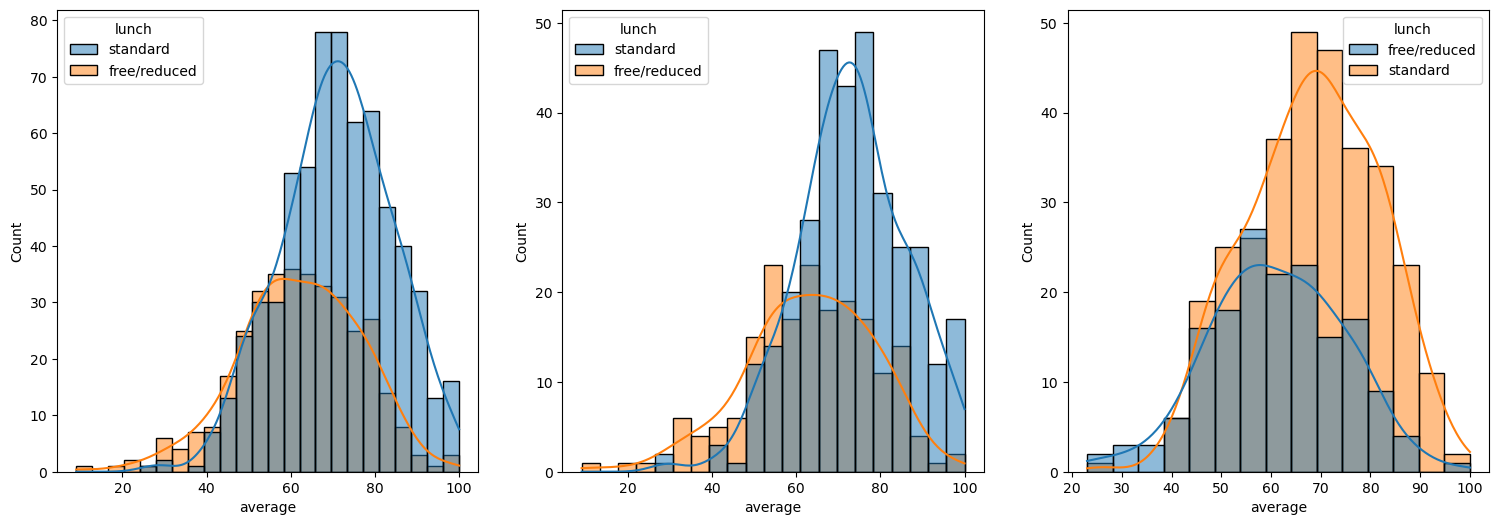

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insight
<li> standard lunch help to achive well performation
 

In [19]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total score', 'average'],
      dtype='object')

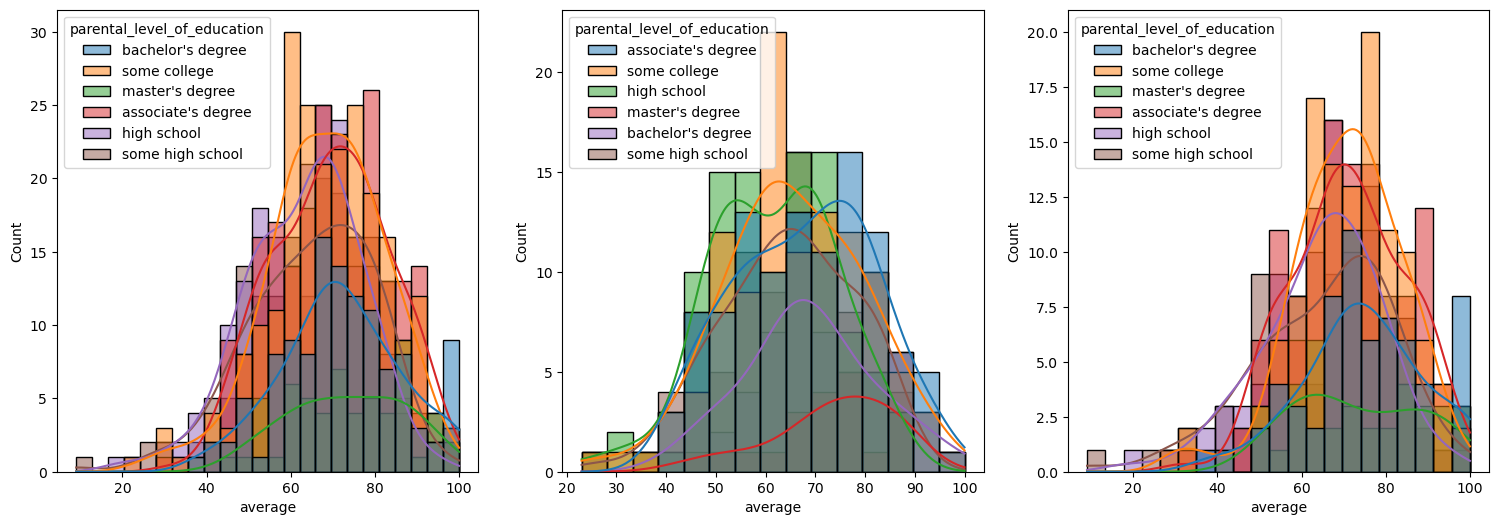

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
<li>In general parent's education don't help student perform well in exam.
<li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
<li>3rd plot we can see there is no effect of parent's education on female students.

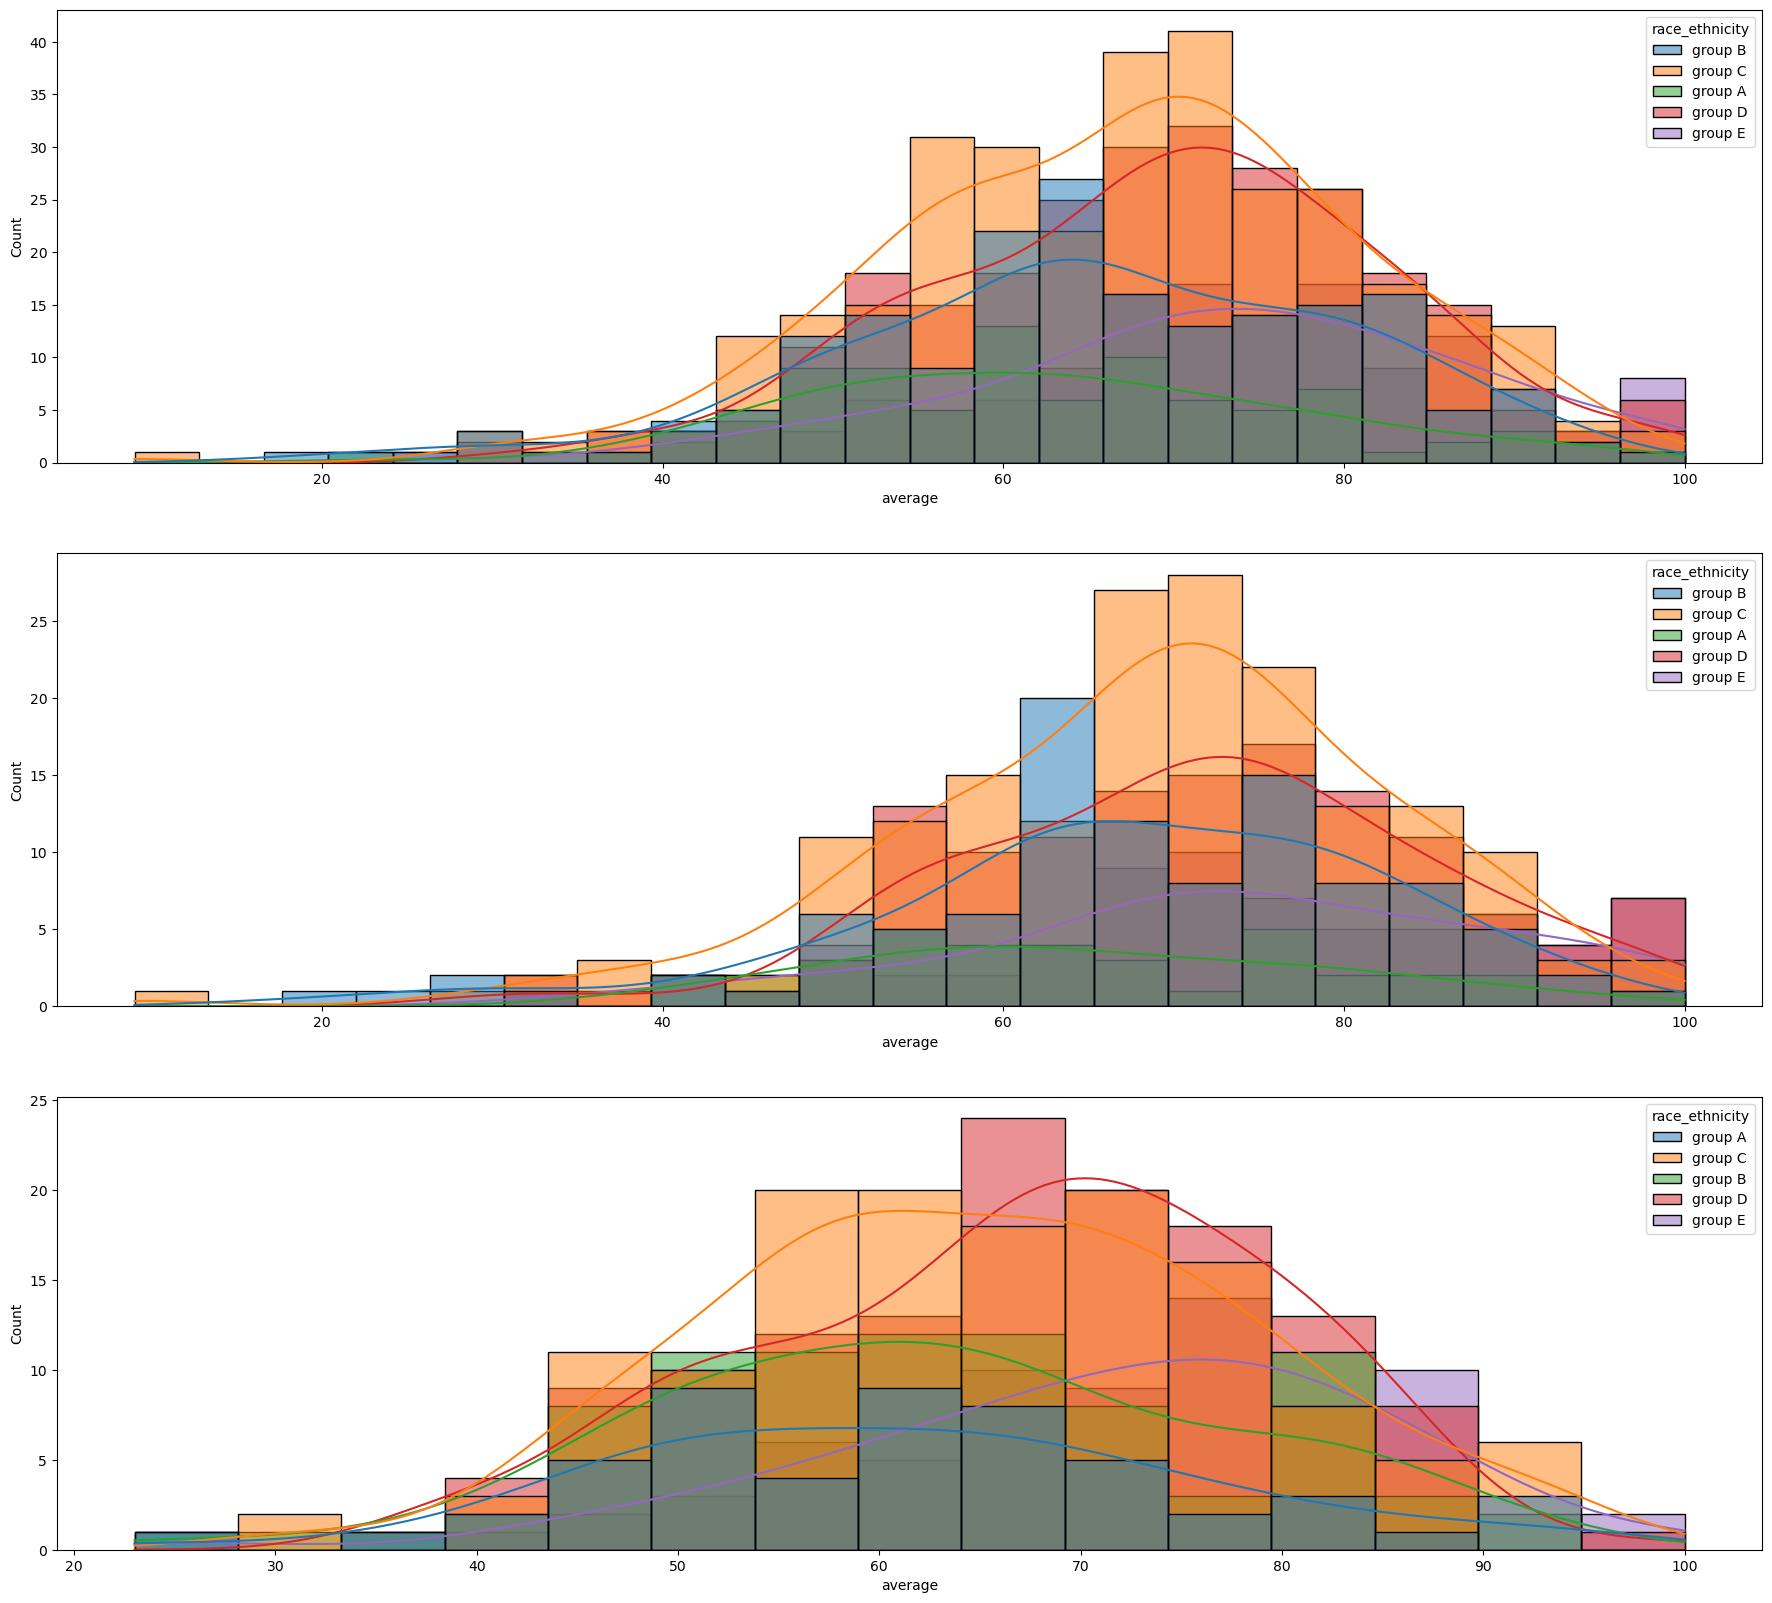

In [21]:
plt.subplots(ncols=1,nrows=3,figsize=(22,20))
plt.subplot(3,1,1)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(3,1,2)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(3,1,3)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insight
<li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

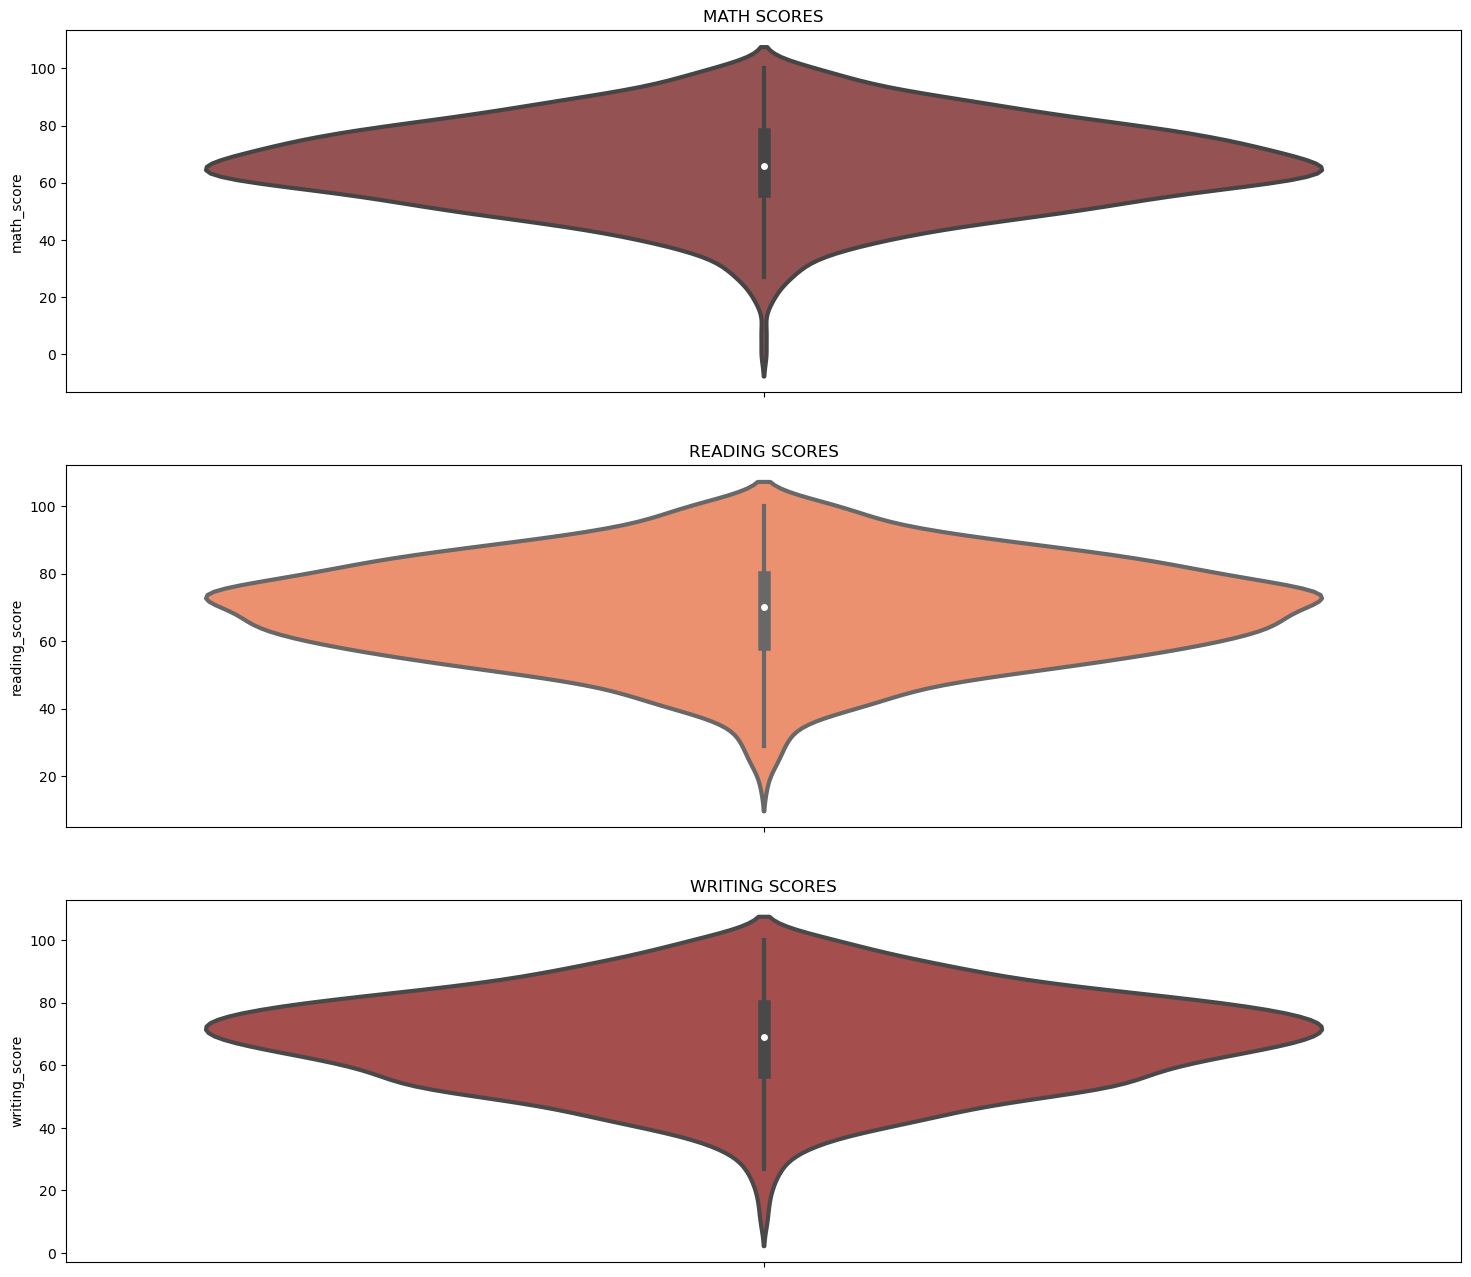

In [22]:
fig,ax=plt.subplots(ncols=1,nrows=3,figsize=(18,16))
plt.subplot(3, 1, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='#A04747',linewidth=3)
plt.subplot(3,1, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='#FF885B',linewidth=3)
plt.subplot(3,1, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='#B43F3F',linewidth=3)
plt.show()

Insights
<li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

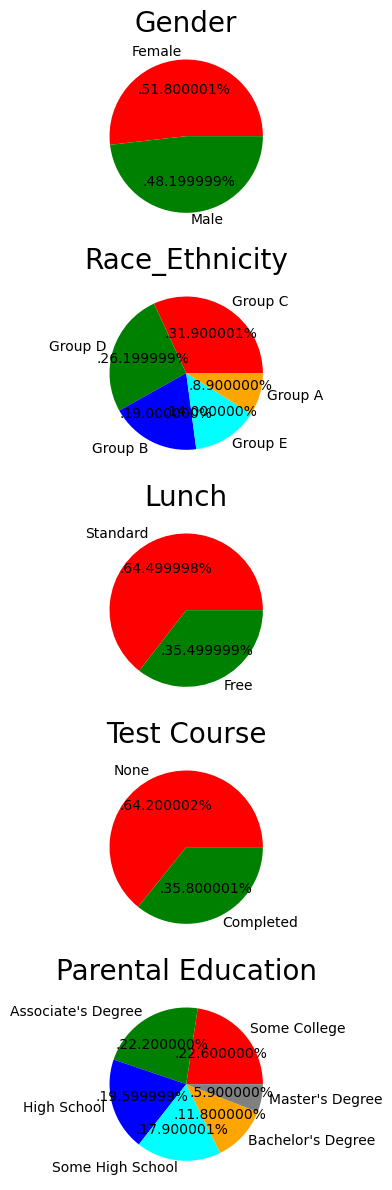

In [23]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(5,1, 1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(5,1, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(5,1, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(5,1, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(5,1, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
<li>Number of Male and Female students is almost equal
<li>Number students are greatest in Group C
<li>Number of students who have standard lunch are greater
<li>Number of students who have not enrolled in any test preparation course is greater
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

Feature Wise visual 

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

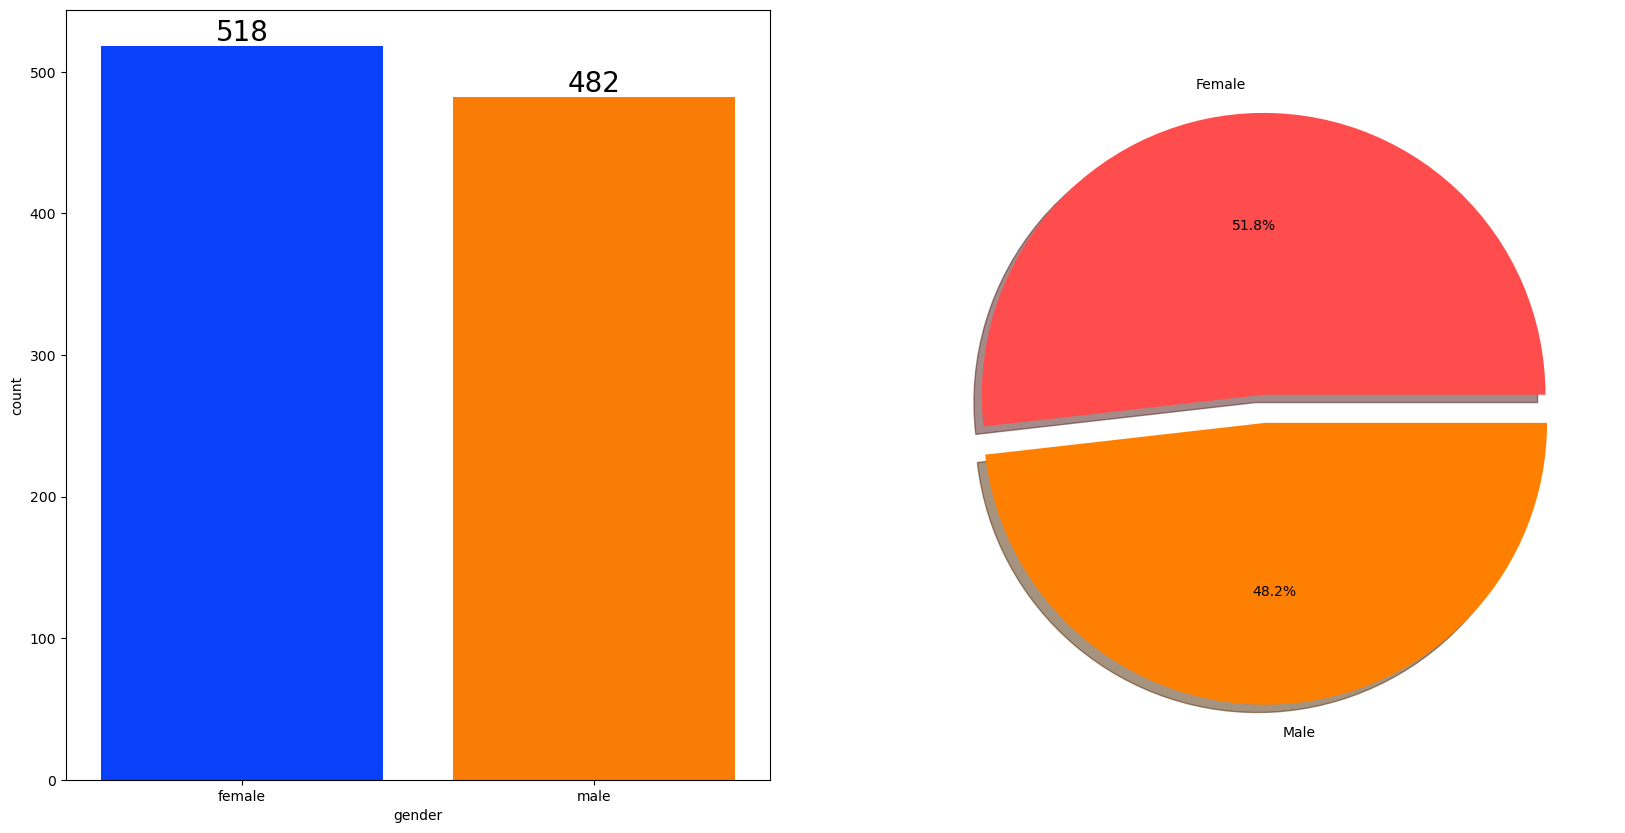

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [25]:
gender_group = df.groupby('gender').mean(numeric_only=True)

gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


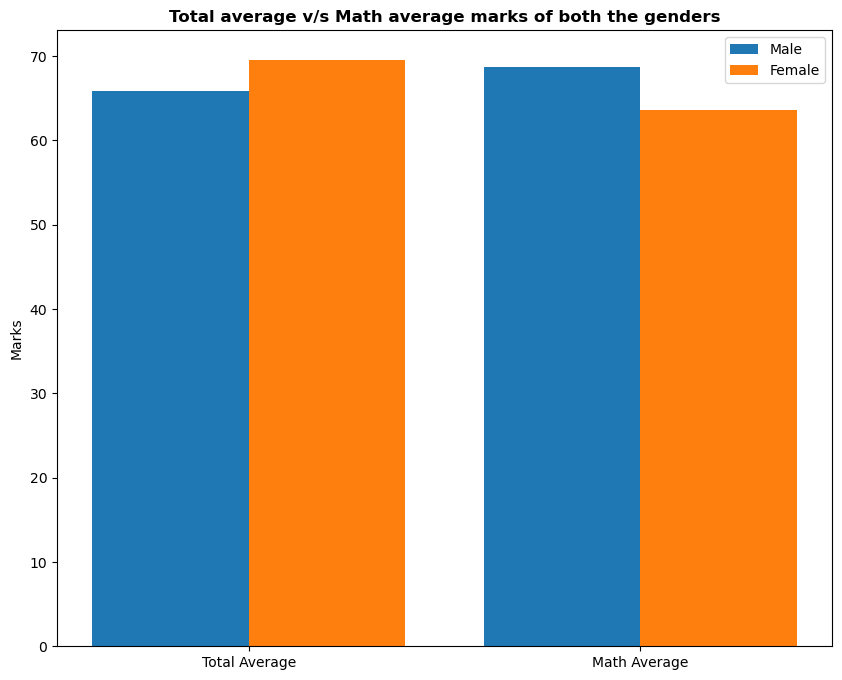

In [26]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
<li>On an average females have a better overall score than men.
<li>whereas males have scored higher in Maths.

 RACE/EHNICITY COLUMN
<li>How is Group wise distribution ?
<li>Is Race/Ehnicity has any impact on student's performance ?

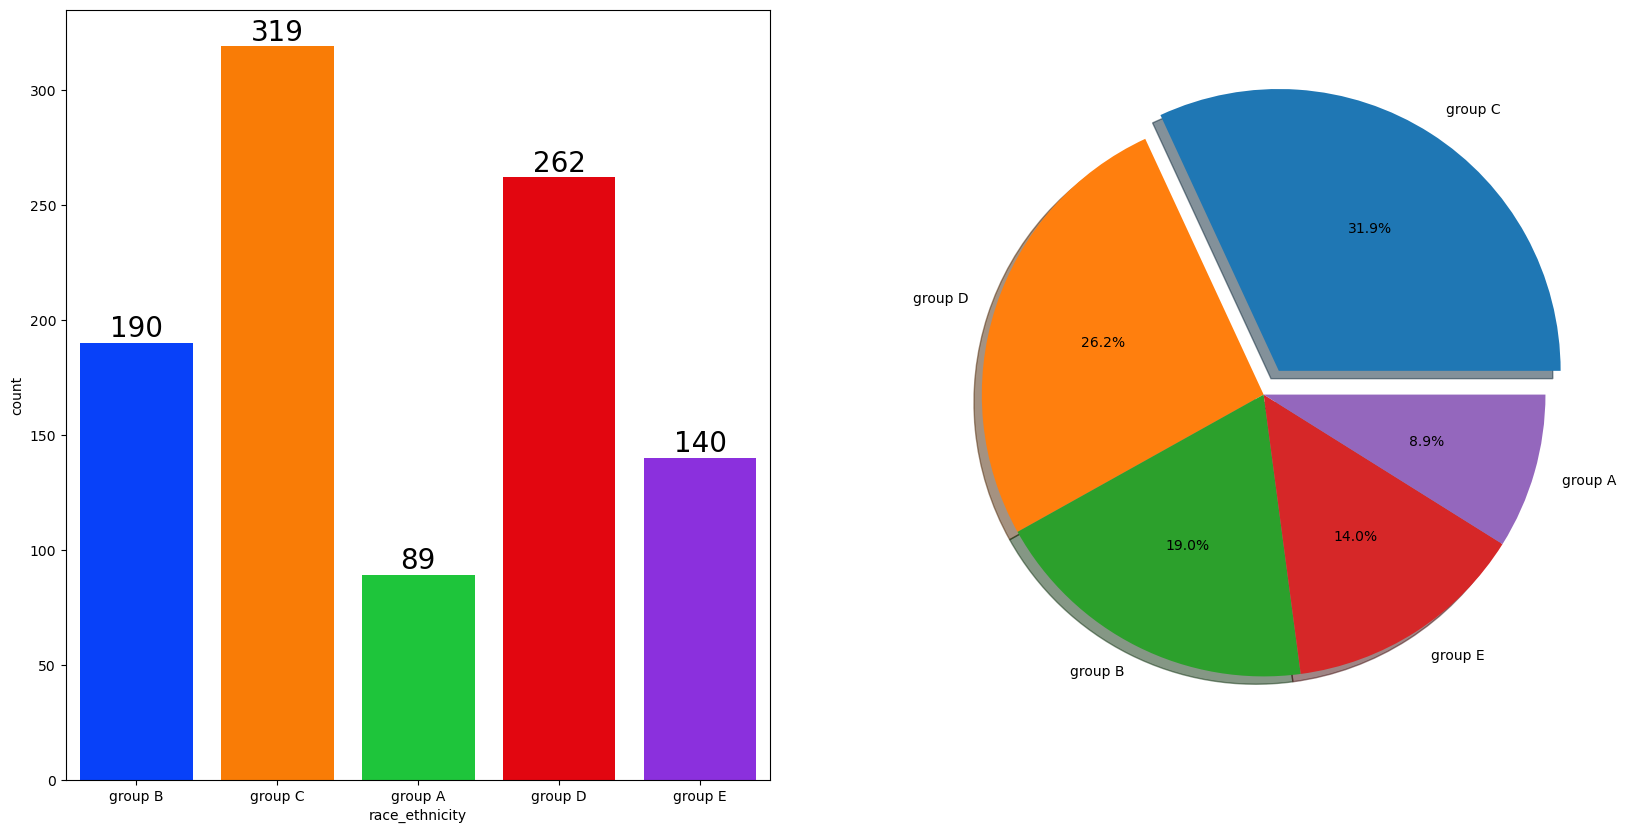

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
<li>Most of the student belonging from group C /group D.
<li>Lowest number of students belong to group A.

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

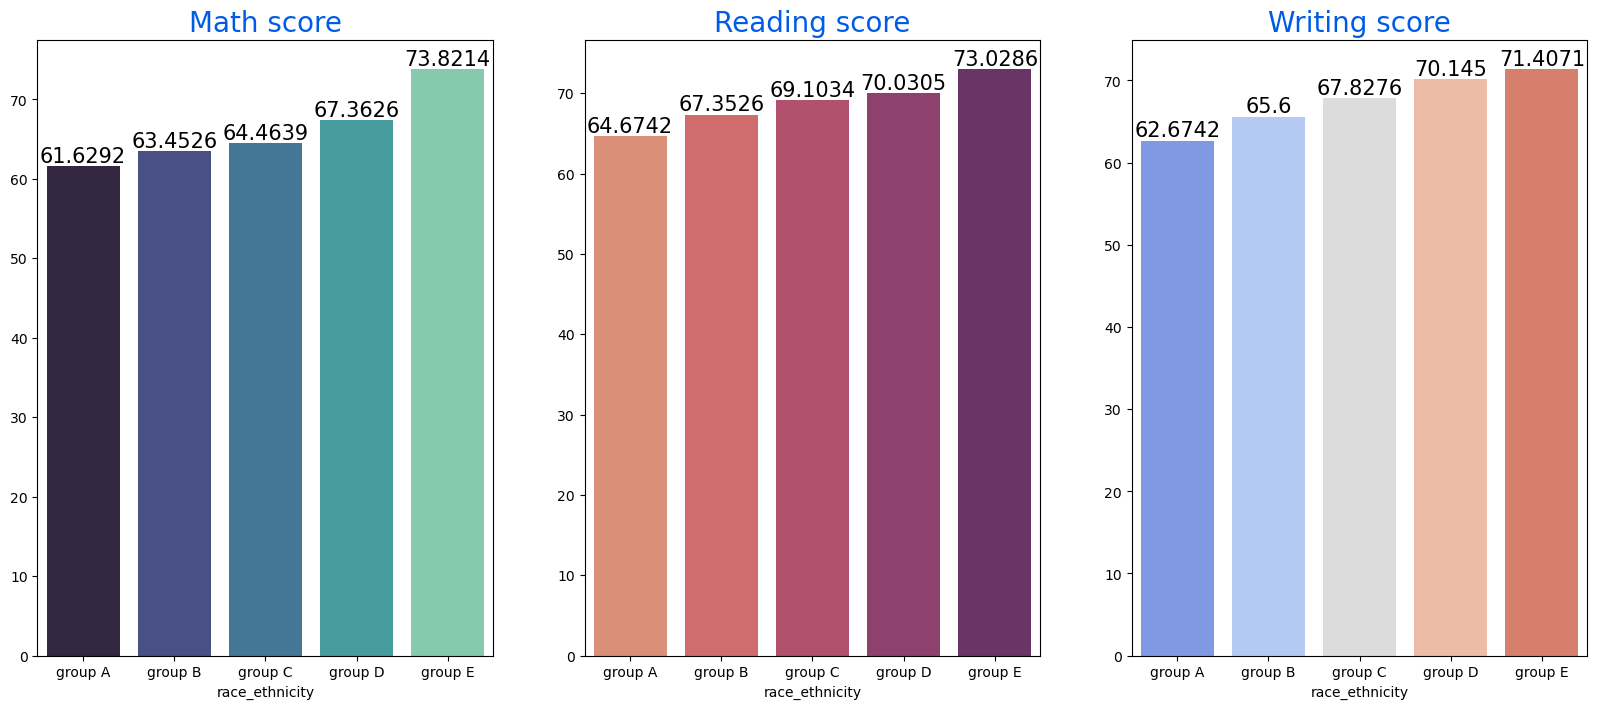

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insight
<li> Group E perform successfully achive in every exam
<li> Group A  perform poorly in every exam


PARENTAL LEVEL OF EDUCATION COLUMN
<li>What is educational background of student's parent ?
<li>Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

In [49]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

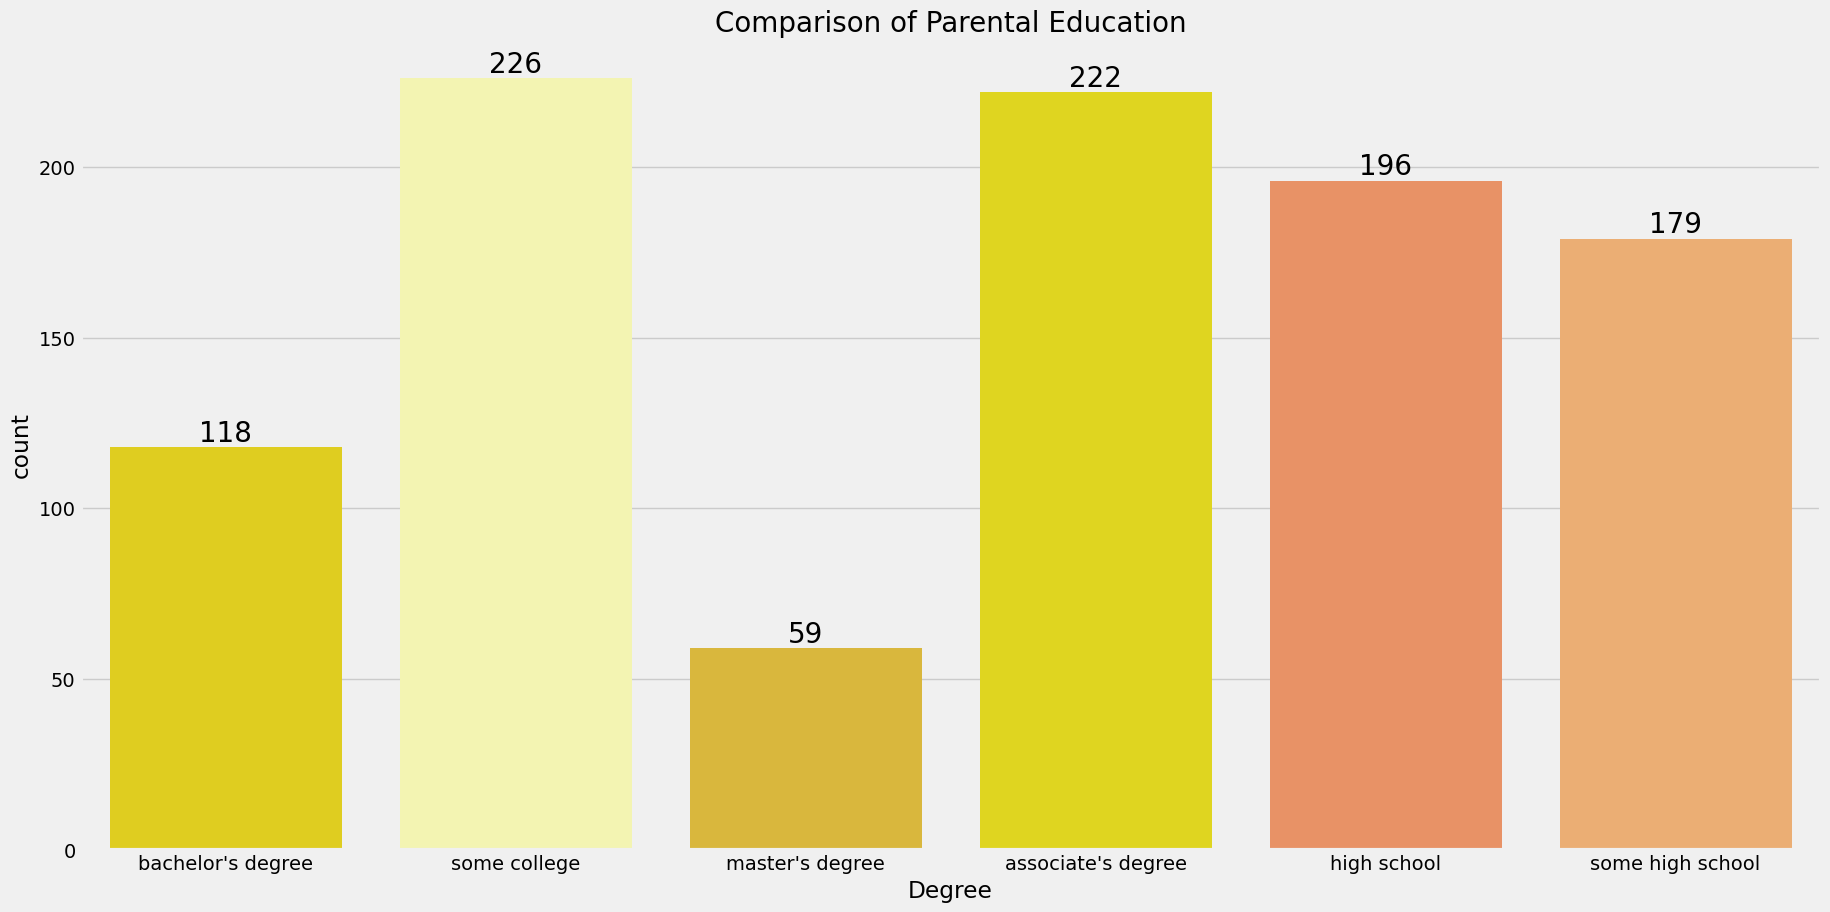

In [51]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(x='parental_level_of_education',data=df, palette = ['#FFE700','#FEFFA7','#F3C623','#FFF100','#FD8B51','#FFAD60'])
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# sns.countplot(x='parental_level_of_education',data=df, palette = 'Blues')

Insight
<li> Largest no of parents graduate from some college

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

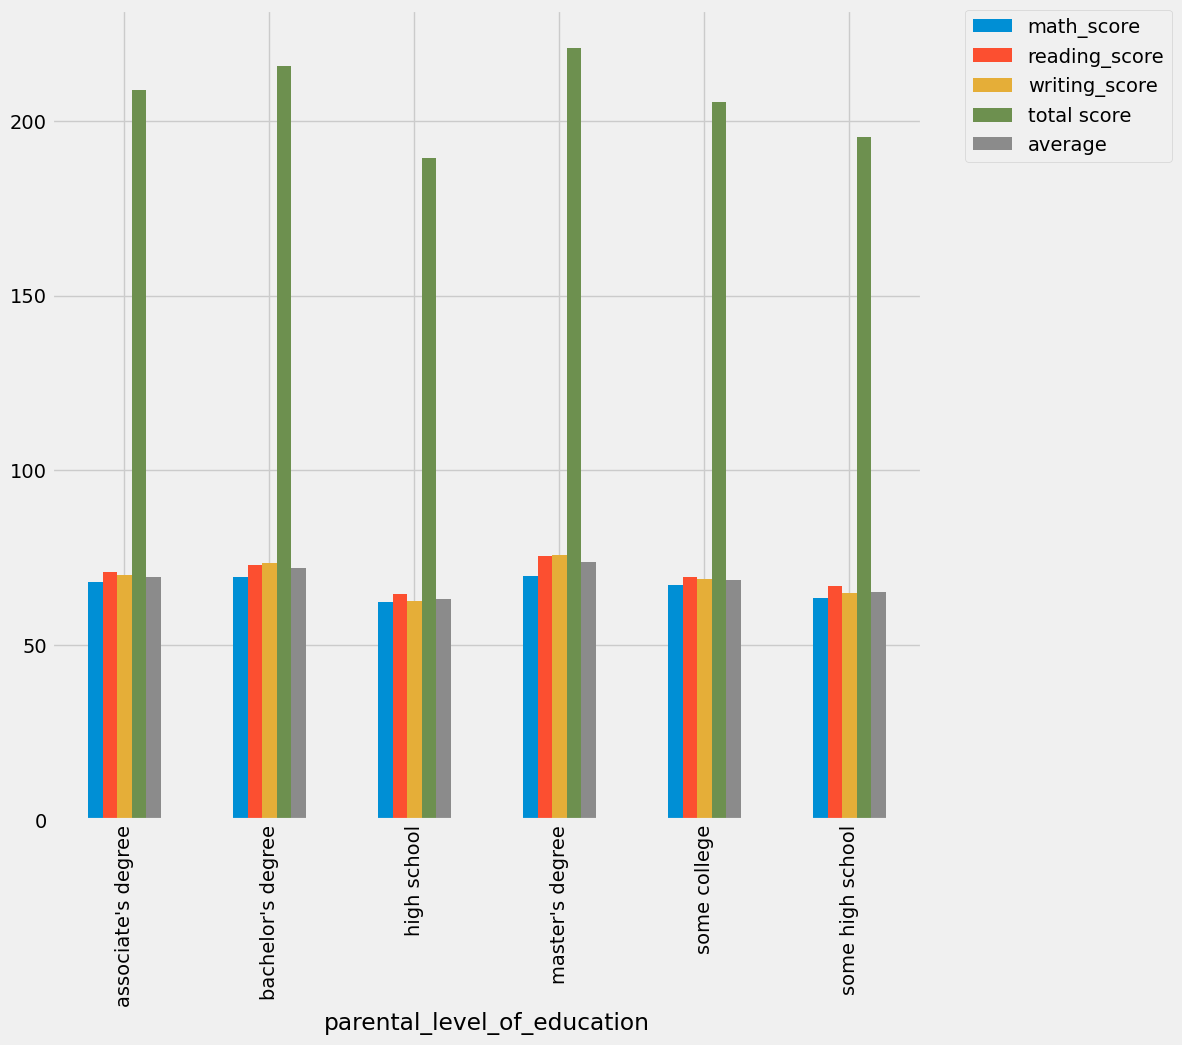

In [55]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='bar',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

LUNCH COLUMN
<li>Which type of lunch is most common amoung students ?
<li>What is the effect of lunch type on test results?

In [57]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


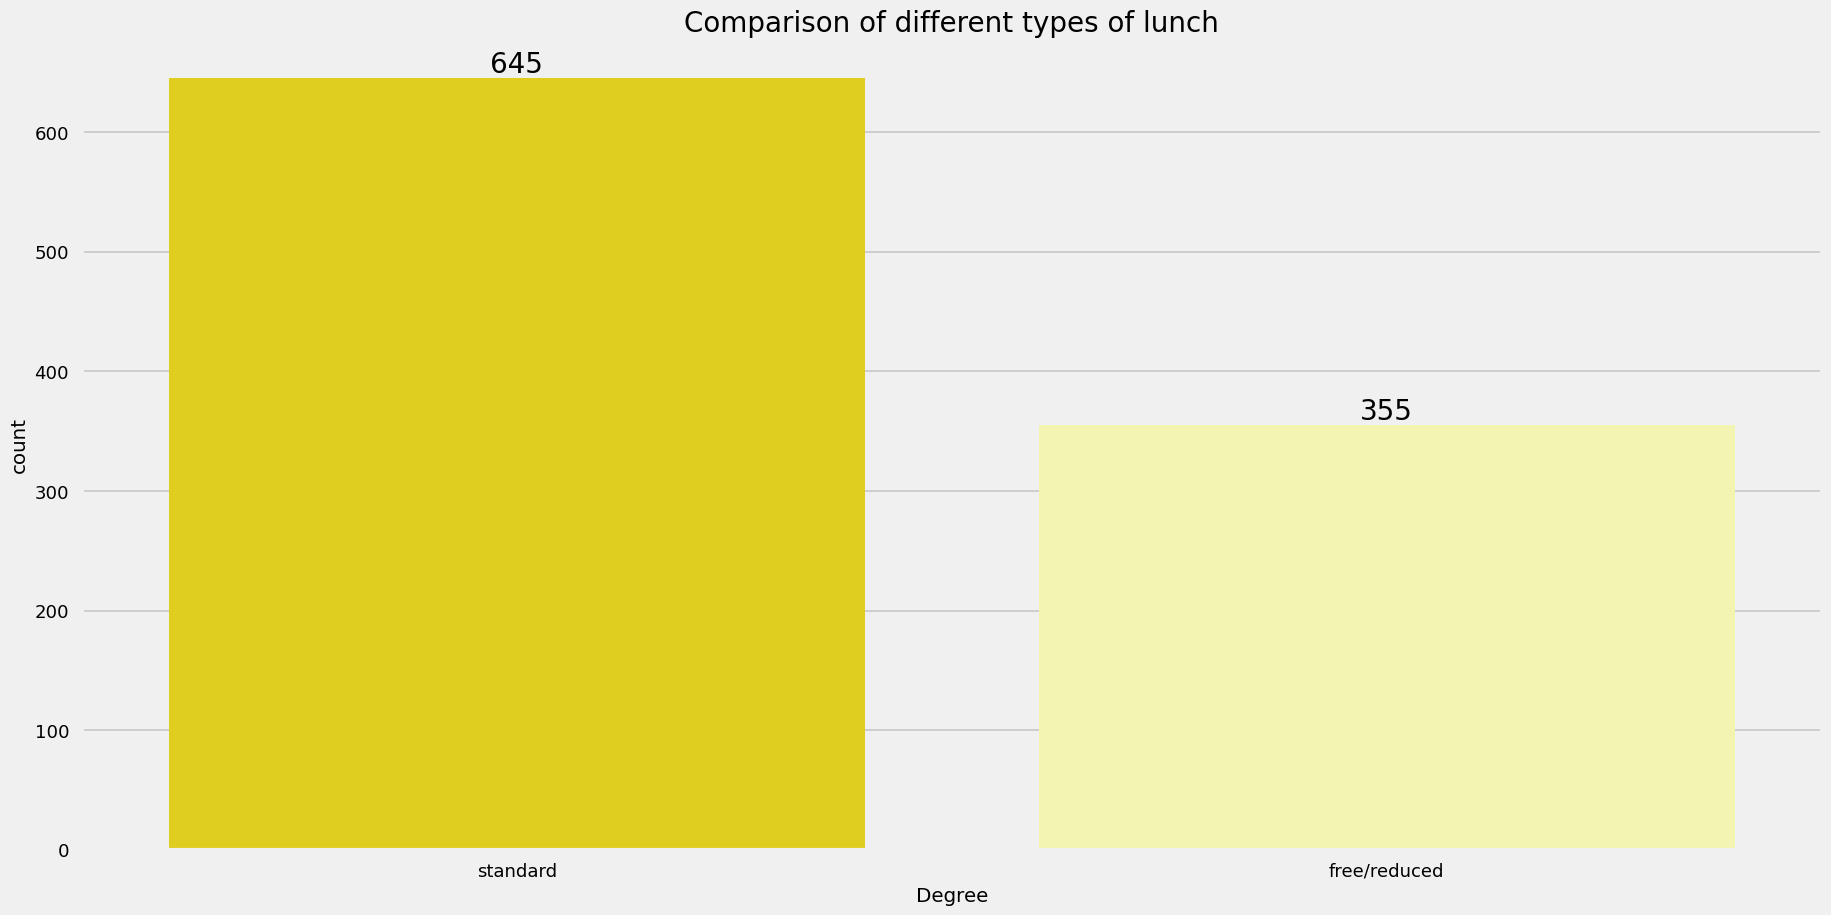

In [59]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
sns.countplot(x='lunch',data=df, palette = ['#FFE700','#FEFFA7','#F3C623','#FFF100','#FD8B51','#FFAD60'])
for container in ax.containers:
    ax.bar_label(container,color='black',size=20)

plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
<li>Students being served Standard lunch was more than free lunch

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

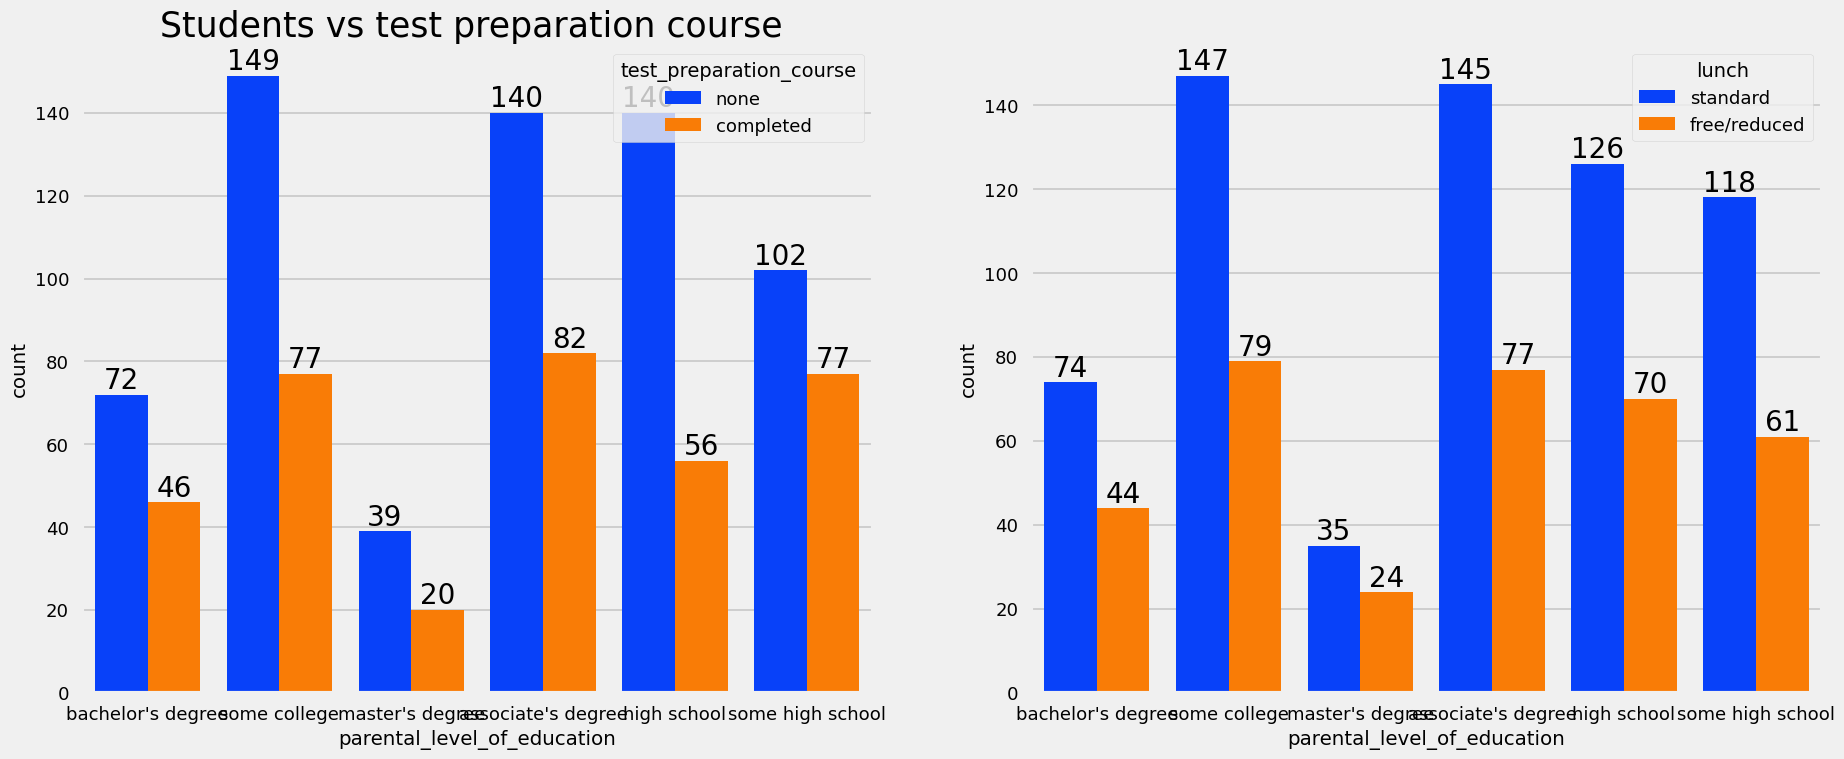

In [65]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

Insights
<li>Students who get Standard Lunch tend to perform better than students who got free/reduced lunch